# Imports

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os
import sys
import seaborn as sns
from PIL import Image
import pickle

import matplotlib.pyplot as plt
import scipy
import math

## Helper Functions

In [39]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)
import nodalStrength as ns
import normalize as norm

# Set Directory Paths

In [40]:
# Directory path to load formatted gfap_ferritin_dataDir Data
%store -r gfap_ferritin_dataDir

# Directory path to save Calcualted Analysis Data
%store -r gfap_ferritin_CalData

# Directory path to save Figures
%store -r gfap_ferritin_Fig

# Loading

## Cov Matrices

### TAU - GFAP, Ferritin (Dropped)

In [41]:
# covGFAP_TAU_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TAU_Drop.pkl'), 'rb') as f:
    covGFAP_TAU_Drop = pickle.load(f)
f.close()
# covFerr_TAU_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covFerr_TAU_Drop.pkl'), 'rb') as f:
    covFerr_TAU_Drop = pickle.load(f)
f.close()
# cov_TAU_Drop_GFAP
with open(os.path.join(gfap_ferritin_CalData, 'cov_TAU_Drop_GFAP.pkl'), 'rb') as f:
    cov_TAU_Drop_GFAP = pickle.load(f)
f.close()
# cov_TAU_Drop_Ferr
with open(os.path.join(gfap_ferritin_CalData, 'cov_TAU_Drop_Ferr.pkl'), 'rb') as f:
    cov_TAU_Drop_Ferr = pickle.load(f)
f.close()

### TDP - GFAP, Ferritin (Dropped)

In [42]:
# covGFAP_TDP_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TDP_Drop.pkl'), 'rb') as f:
    covGFAP_TDP_Drop = pickle.load(f)
f.close()
# covFerr_TDP_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covFerr_TDP_Drop.pkl'), 'rb') as f:
    covFerr_TDP_Drop = pickle.load(f)
f.close()
# cov_TDP_Drop_GFAP
with open(os.path.join(gfap_ferritin_CalData, 'cov_TDP_Drop_GFAP.pkl'), 'rb') as f:
    cov_TDP_Drop_GFAP = pickle.load(f)
f.close()
# cov_TDP_Drop_Ferr
with open(os.path.join(gfap_ferritin_CalData, 'cov_TDP_Drop_Ferr.pkl'), 'rb') as f:
    cov_TDP_Drop_Ferr = pickle.load(f)
f.close()

In [43]:
# PREVIOUS GM/WM
# covTAU_Drop_GFAP_GM
with open(os.path.join(gfap_ferritin_CalData, 'covTAU_Drop_GFAP_GM.pkl'), 'rb') as f:
    covTAU_Drop_GFAP_GM = pickle.load(f)
f.close()
# covTDP_Drop_GFAP_GM
with open(os.path.join(gfap_ferritin_CalData, 'covTDP_Drop_GFAP_GM.pkl'), 'rb') as f:
    covTDP_Drop_GFAP_GM = pickle.load(f)
f.close()

# covTAU_Drop_Ferr_GM
with open(os.path.join(gfap_ferritin_CalData, 'covTAU_Drop_Ferr_GM.pkl'), 'rb') as f:
    covTAU_Drop_Ferr_GM = pickle.load(f)
f.close()
# covTDP_Drop_Ferr_GM
with open(os.path.join(gfap_ferritin_CalData, 'covTDP_Drop_Ferr_GM.pkl'), 'rb') as f:
    covTDP_Drop_Ferr_GM = pickle.load(f)
f.close()
#--------------------------------------------------------------------------------
# covTAU_Drop_GFAP_WM
with open(os.path.join(gfap_ferritin_CalData, 'covTAU_Drop_GFAP_WM.pkl'), 'rb') as f:
    covTAU_Drop_GFAP_WM = pickle.load(f)
f.close()
# covTDP_Drop_GFAP_WM
with open(os.path.join(gfap_ferritin_CalData, 'covTDP_Drop_GFAP_WM.pkl'), 'rb') as f:
    covTDP_Drop_GFAP_WM = pickle.load(f)
f.close()

# covTAU_Drop_Ferr_WM
with open(os.path.join(gfap_ferritin_CalData, 'covTAU_Drop_Ferr_WM.pkl'), 'rb') as f:
    covTAU_Drop_Ferr_WM = pickle.load(f)
f.close()
# covTDP_Drop_Ferr_WM
with open(os.path.join(gfap_ferritin_CalData, 'covTDP_Drop_Ferr_WM.pkl'), 'rb') as f:
    covTDP_Drop_Ferr_WM = pickle.load(f)
f.close()

## Log %AO

### TAU - GFAP, Ferritin (Dropped)

In [44]:
# GFAP_TAU_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'GFAP_TAU_Drop.pkl'), 'rb') as f:
    GFAP_TAU_Drop = pickle.load(f)
f.close()

# Ferr_TAU_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'Ferr_TAU_Drop.pkl'), 'rb') as f:
    Ferr_TAU_Drop = pickle.load(f)
f.close()

# PATH_TAU_Drop_GFAP
with open(os.path.join(gfap_ferritin_dataDir, 'PATH_TAU_Drop_GFAP.pkl'), 'rb') as f:
    PATH_TAU_Drop_GFAP = pickle.load(f)
f.close()

# PATH_TAU_Drop_Ferr
with open(os.path.join(gfap_ferritin_dataDir, 'PATH_TAU_Drop_Ferr.pkl'), 'rb') as f:
    PATH_TAU_Drop_Ferr = pickle.load(f)
f.close()

### TDP - GFAP, Ferritin (Dropped)

In [45]:
# GFAP_TDP_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'GFAP_TDP_Drop.pkl'), 'rb') as f:
    GFAP_TDP_Drop = pickle.load(f)
f.close()

# Ferr_TDP_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'Ferr_TDP_Drop.pkl'), 'rb') as f:
    Ferr_TDP_Drop = pickle.load(f)
f.close()

# PATH_TDP_Drop_GFAP
with open(os.path.join(gfap_ferritin_dataDir, 'PATH_TDP_Drop_GFAP.pkl'), 'rb') as f:
    PATH_TDP_Drop_GFAP = pickle.load(f)
f.close()

# PATH_TDP_Drop_Ferr
with open(os.path.join(gfap_ferritin_dataDir, 'PATH_TDP_Drop_Ferr.pkl'), 'rb') as f:
    PATH_TDP_Drop_Ferr = pickle.load(f)
f.close()

# Normalize each TAU and TDP separately (to range -1, 1)

In [46]:
# Min/Max Range of Normalizing
t_min = -1
t_max = 1

In [47]:
# normalizing TAU EXCLUDING NaN!
GFAP_TAU_Drop_Norm = norm.normalize2d(GFAP_TAU_Drop, t_min, t_max)
Ferr_TAU_Drop_Norm = norm.normalize2d(Ferr_TAU_Drop, t_min, t_max)

PATH_TAU_Drop_GFAP_Norm = norm.normalize2d(PATH_TAU_Drop_GFAP, t_min, t_max)
PATH_TAU_Drop_Ferr_Norm = norm.normalize2d(PATH_TAU_Drop_Ferr, t_min, t_max)

# normalizing TDP EXCLUDING NaN!
GFAP_TDP_Drop_Norm = norm.normalize2d(GFAP_TDP_Drop, t_min, t_max)
Ferr_TDP_Drop_Norm = norm.normalize2d(Ferr_TDP_Drop, t_min, t_max)

PATH_TDP_Drop_GFAP_Norm = norm.normalize2d(PATH_TDP_Drop_GFAP, t_min, t_max)
PATH_TDP_Drop_Ferr_Norm = norm.normalize2d(PATH_TDP_Drop_Ferr, t_min, t_max)

# Draw Nodal Strength vs Log %AO

In [48]:
def nonZeroDegCorr(DataX1, covMatX1, DataX2, covMatX2,
                   title1, title2, titlefont,
                   x_label, y_label, labelfont,
                   outputDir, outputName, linear_regression = False):
    
    # Copy the Covariance Matrix and set negative values as zero
    covMatXnz1 = covMatX1.copy()
    covMatXnz1[covMatXnz1 < 0] = 0
    
    covMatXnz2 = covMatX2.copy()
    covMatXnz2[covMatXnz2 < 0] = 0
    
    # Get sum of covariance values for all regions respective to each region
    # Similar to computing the degree of nodes in a Network
    degX1 = np.sum(covMatXnz1, axis=0, where=~np.isnan(covMatXnz1))
    degX2 = np.sum(covMatXnz2, axis=0, where=~np.isnan(covMatXnz2))
    
    # Get Y-axis min and max
    combData = np.concatenate((np.nanmean(DataX1, axis=0), 
                               np.nanmean(DataX2, axis=0)))

    ymin = np.nanmin(combData) - 0.1
    ymax = np.nanmax(combData) + 0.1
    
    # Create masks to filter out NaN values in degX1 and degX2
    mask_dataX1 = ~np.isnan(np.nanmean(DataX1, axis=0))
    mask_dataX2 = ~np.isnan(np.nanmean(DataX2, axis=0))

    # Filter out NaNs from degX1, degX2, and mean data of DataX1 and DataX2
    degX1_filtered = degX1[mask_dataX1]
    degX2_filtered = degX2[mask_dataX2]
    DataX1_mean_filtered = np.nanmean(DataX1, axis=0)[mask_dataX1]
    DataX2_mean_filtered = np.nanmean(DataX2, axis=0)[mask_dataX2]

    # Define figure
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 7))
    
    # Data 1
    axs[0].scatter(degX1_filtered, DataX1_mean_filtered, facecolors='none', edgecolors='b')
    
    # Get r and p-value
    r1, p1 = scipy.stats.pearsonr(degX1_filtered, DataX1_mean_filtered)
    
    # Data 2
    axs[1].scatter(degX2_filtered, DataX2_mean_filtered, facecolors='none', edgecolors='b')
    
    # Get r and p-value
    r2, p2 = scipy.stats.pearsonr(degX2_filtered, DataX2_mean_filtered)
   
    # set x, y-axis range
#     axs[0].set_xlim([xmin, xmax])
#     axs[1].set_xlim([xmin, xmax])

    axs[0].set_ylim([ymin, ymax])
    axs[1].set_ylim([ymin, ymax])

 
    # Set title
    #plt.title(title + f", r={r:.6f}, p={p:.6f}", fontsize=10)
    axs[0].set_title(title1, fontsize = titlefont)
    axs[1].set_title(title2, fontsize = titlefont)
    
    # Draw Linear Regression Line (is set to True)
    if linear_regression:
        # Obtain m (slope) and b(intercept) of linear regression line
        m1, b1 = np.polyfit(degX1_filtered, DataX1_mean_filtered, 1)
        m2, b2 = np.polyfit(degX2_filtered, DataX2_mean_filtered, 1)
        
        #add linear regression line to scatterplot 
        axs[0].plot(degX1_filtered, m1*degX1_filtered+b1, color="red")
        axs[1].plot(degX2_filtered, m2*degX2_filtered+b2, color="red")

    # Set X and Y Labels
    axs[0].set_xlabel(x_label, fontsize = labelfont)
    axs[0].set_ylabel(y_label, fontsize = labelfont)
    axs[1].set_xlabel(x_label, fontsize = labelfont)
    
    # Record r and p values
    if p1 < 0.05:
        axs[0].text(0.5, -0.12, f'r={r1: .4f}, *p={p1: .4f}', ha='center', va='center', transform=axs[0].transAxes, fontsize=12)
    else:
        axs[0].text(0.5, -0.12, f'r={r1: .4f}, p={p1: .4f}', ha='center', va='center', transform=axs[0].transAxes, fontsize=12)
    
    if p2 < 0.05:
        axs[1].text(0.5, -0.12, f'r={r2: .4f}, *p={p2: .4f}', ha='center', va='center', transform=axs[1].transAxes, fontsize=12)
    else:
        axs[1].text(0.5, -0.12, f'r={r2: .4f}, p={p2: .4f}', ha='center', va='center', transform=axs[1].transAxes, fontsize=12)
    
    # Set title for the entire figure
    fig.suptitle(outputName)


    # Save Figure
    plt.savefig(os.path.join(outputDir, outputName) + '.png', dpi=400)
    
    # Show Figure
    plt.show()

## Y-axis: GFAP or Ferritin Log %AO / X-axis: Nodal Strength of GFAP or Ferritin Network

### GFAP

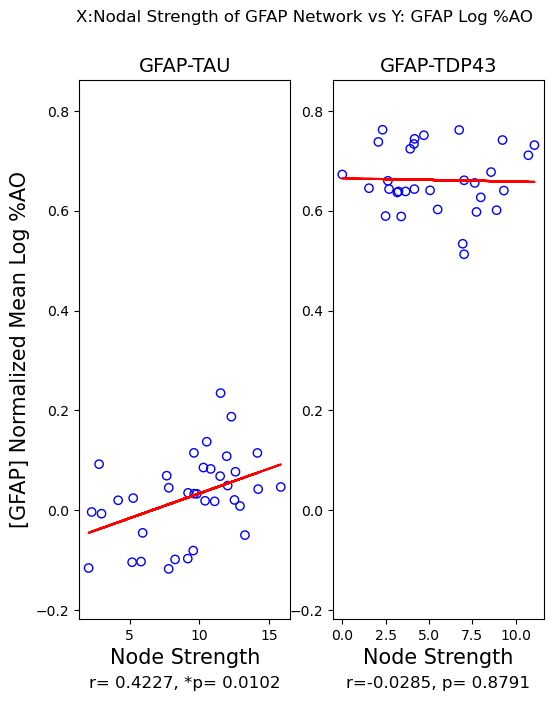

In [49]:
nonZeroDegCorr(GFAP_TAU_Drop_Norm, covGFAP_TAU_Drop, GFAP_TDP_Drop_Norm, covGFAP_TDP_Drop,
               'GFAP-TAU', 'GFAP-TDP43', 14,
               'Node Strength', '[GFAP] Normalized Mean Log %AO', 15,
               gfap_ferritin_Fig, 'X:Nodal Strength of GFAP Network vs Y: GFAP Log %AO', 
               linear_regression = True)

### Ferritin

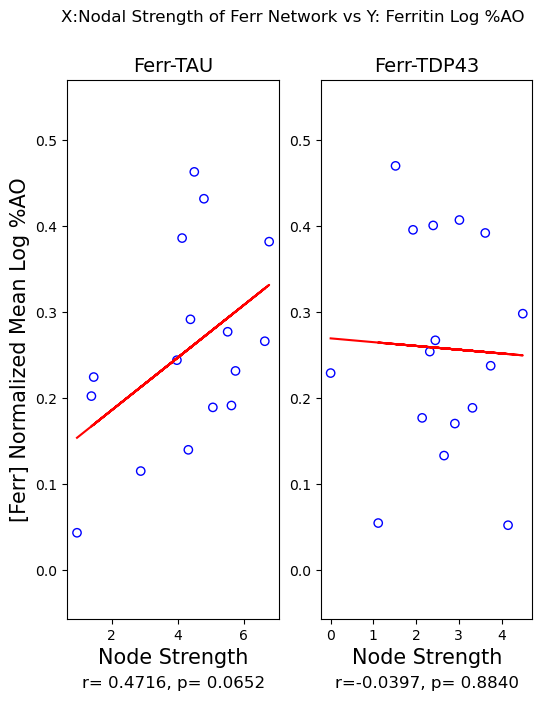

In [50]:
nonZeroDegCorr(Ferr_TAU_Drop_Norm, covFerr_TAU_Drop, Ferr_TDP_Drop_Norm, covFerr_TDP_Drop,
               'Ferr-TAU', 'Ferr-TDP43', 14,
               'Node Strength', '[Ferr] Normalized Mean Log %AO', 15,
               gfap_ferritin_Fig, 'X:Nodal Strength of Ferr Network vs Y: Ferritin Log %AO', 
               linear_regression = True)

## Y-axis: Pathology Log %AO / X-axis: Nodal Strength of GFAP or Ferritin Network

### GFAP

/var/folders/d_/hlp96bh14c98xy43dzm6gp6c0000gn/T/ipykernel_84293/1173590076.py:19: RuntimeWarning: Mean of empty slice
  combData = np.concatenate((np.nanmean(DataX1, axis=0),
/var/folders/d_/hlp96bh14c98xy43dzm6gp6c0000gn/T/ipykernel_84293/1173590076.py:26: RuntimeWarning: Mean of empty slice
  mask_dataX1 = ~np.isnan(np.nanmean(DataX1, axis=0))
/var/folders/d_/hlp96bh14c98xy43dzm6gp6c0000gn/T/ipykernel_84293/1173590076.py:32: RuntimeWarning: Mean of empty slice
  DataX1_mean_filtered = np.nanmean(DataX1, axis=0)[mask_dataX1]


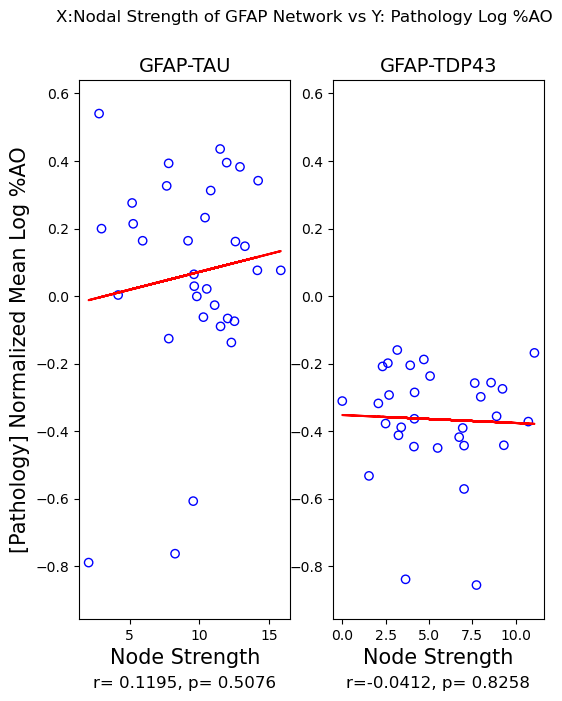

In [51]:
nonZeroDegCorr(PATH_TAU_Drop_GFAP_Norm, covGFAP_TAU_Drop, PATH_TDP_Drop_GFAP_Norm, covGFAP_TDP_Drop,
               'GFAP-TAU', 'GFAP-TDP43', 14,
               'Node Strength', '[Pathology] Normalized Mean Log %AO', 15,
               gfap_ferritin_Fig, 'X:Nodal Strength of GFAP Network vs Y: Pathology Log %AO', 
               linear_regression = True)

### Ferritin

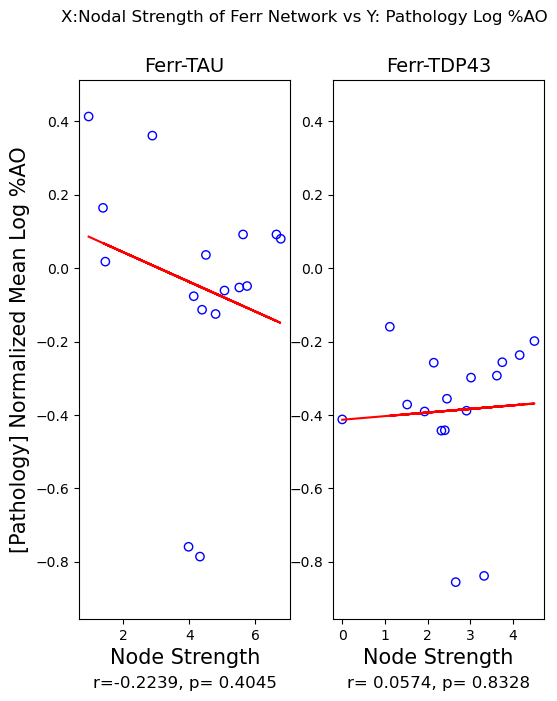

In [52]:
nonZeroDegCorr(PATH_TAU_Drop_Ferr_Norm, covFerr_TAU_Drop, PATH_TDP_Drop_Ferr_Norm, covFerr_TDP_Drop,
               'Ferr-TAU', 'Ferr-TDP43', 14,
               'Node Strength', '[Pathology] Normalized Mean Log %AO', 15,
               gfap_ferritin_Fig, 'X:Nodal Strength of Ferr Network vs Y: Pathology Log %AO', 
               linear_regression = True)

## Y-axis: GFAP or Ferritin Log %AO / X-axis: Nodal Strength of Tau or TDP43 Network

### GFAP

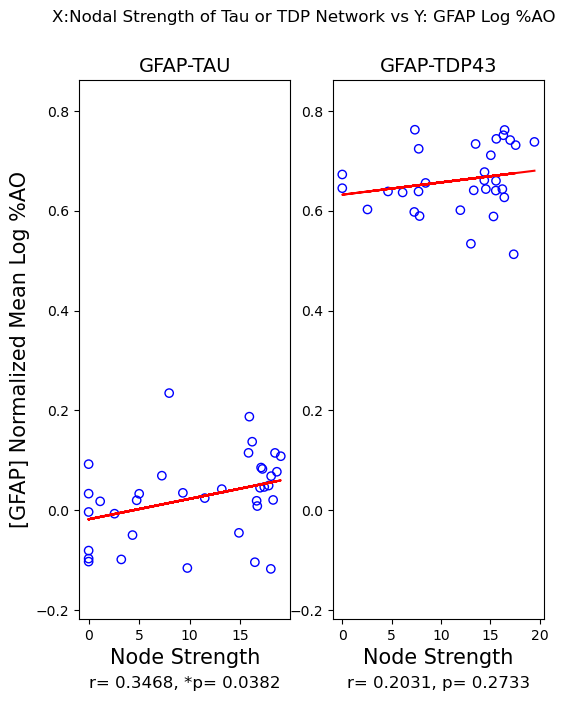

In [53]:
nonZeroDegCorr(GFAP_TAU_Drop_Norm, cov_TAU_Drop_GFAP, GFAP_TDP_Drop_Norm, cov_TDP_Drop_GFAP,
               'GFAP-TAU', 'GFAP-TDP43', 14,
               'Node Strength', '[GFAP] Normalized Mean Log %AO', 15,
               gfap_ferritin_Fig, 'X:Nodal Strength of Tau or TDP Network vs Y: GFAP Log %AO', 
               linear_regression = True)

### Ferritin

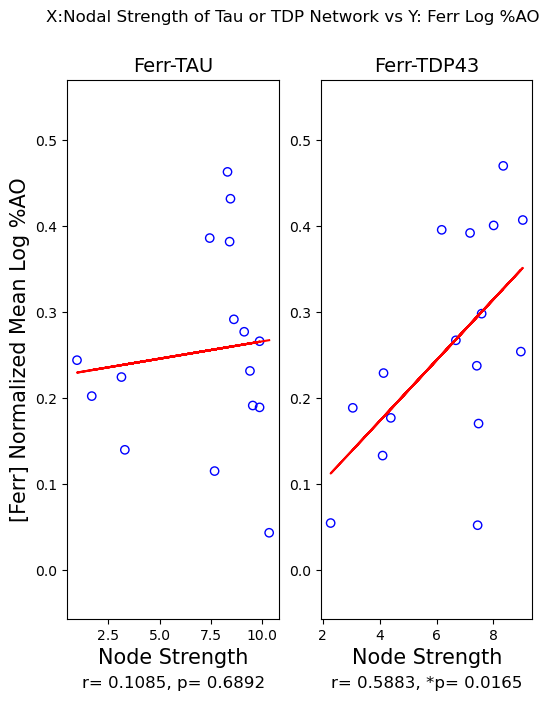

In [54]:
nonZeroDegCorr(Ferr_TAU_Drop_Norm, cov_TAU_Drop_Ferr, Ferr_TDP_Drop_Norm, cov_TDP_Drop_Ferr,
               'Ferr-TAU', 'Ferr-TDP43', 14,
               'Node Strength', '[Ferr] Normalized Mean Log %AO', 15,
               gfap_ferritin_Fig, 'X:Nodal Strength of Tau or TDP Network vs Y: Ferr Log %AO', 
               linear_regression = True)

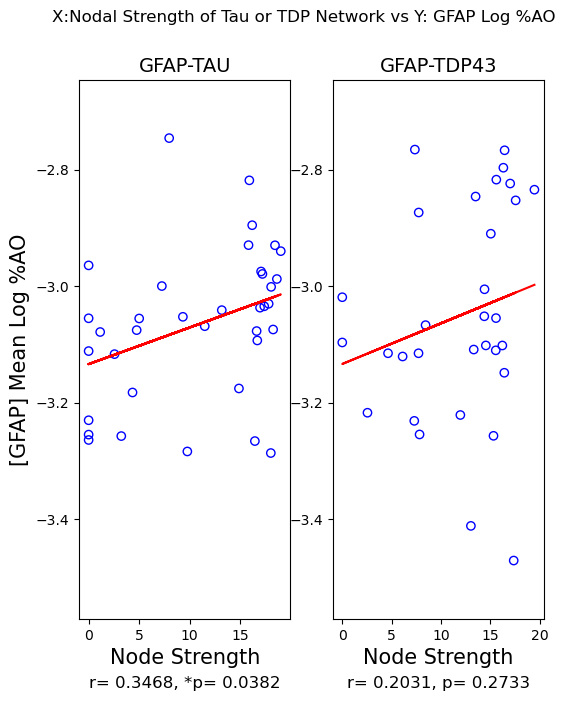

In [55]:
nonZeroDegCorr(GFAP_TAU_Drop, cov_TAU_Drop_GFAP, GFAP_TDP_Drop, cov_TDP_Drop_GFAP,
               'GFAP-TAU', 'GFAP-TDP43', 14,
               'Node Strength', '[GFAP] Mean Log %AO', 15,
               gfap_ferritin_Fig, 'X:Nodal Strength of Tau or TDP Network vs Y: GFAP Log %AO', 
               linear_regression = True)

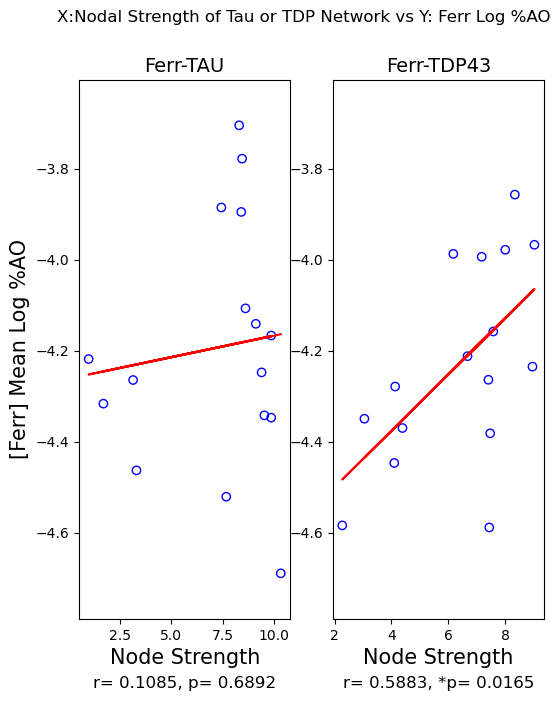

In [56]:
nonZeroDegCorr(Ferr_TAU_Drop, cov_TAU_Drop_Ferr, Ferr_TDP_Drop, cov_TDP_Drop_Ferr,
               'Ferr-TAU', 'Ferr-TDP43', 14,
               'Node Strength', '[Ferr] Mean Log %AO', 15,
               gfap_ferritin_Fig, 'X:Nodal Strength of Tau or TDP Network vs Y: Ferr Log %AO', 
               linear_regression = True)

In [57]:
import pandas as pd
pd.DataFrame(covTAU_Drop_Ferr_GM).head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,0.376753,0.820083,0.845703,0.785595,0.292782,0.767276,0.544806,NaN,NaN,0.385391,0.418893,NaN,NaN,0.323591,0.849838
1,0.376753,NaN,0.470357,0.317238,0.252127,0.333717,0.384043,NaN,NaN,NaN,0.116023,0.316864,NaN,NaN,0.146290,NaN
2,0.820083,0.470357,NaN,0.868088,0.789894,0.235412,0.908664,0.565328,NaN,NaN,0.820044,0.809337,0.819187,NaN,0.421689,0.758508
3,0.845703,0.317238,0.868088,NaN,0.786640,0.269916,0.889262,0.524885,NaN,NaN,0.961043,0.926176,0.951107,NaN,0.747908,0.945220
4,0.785595,0.252127,0.789894,0.786640,NaN,0.218672,0.756378,0.882748,0.704544,NaN,0.479277,0.319064,0.356048,NaN,0.220975,0.892186


In [58]:
pd.DataFrame(covTAU_Drop_Ferr_WM).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,0.649355,0.798618,0.635027,0.739216,0.589492,0.742138,0.557143,NaN,NaN,0.265540,0.641553,0.336505,NaN,0.379920,0.811158
1,0.649355,NaN,0.641101,0.417195,0.420244,0.370323,0.621813,NaN,NaN,NaN,NaN,0.163541,NaN,NaN,NaN,0.315723
2,0.798618,0.641101,NaN,0.812698,0.766594,0.551436,0.894563,0.450303,NaN,NaN,0.865571,0.848556,0.523127,NaN,0.807873,0.879424
3,0.635027,0.417195,0.812698,NaN,0.771975,0.361759,0.796516,0.794198,NaN,NaN,0.729617,0.858279,0.706200,0.498162,0.686949,0.756737
4,0.739216,0.420244,0.766594,0.771975,NaN,0.468859,0.753288,0.838642,0.66461,NaN,0.155863,0.374709,0.563308,0.929026,0.120874,0.734392


## Y-axis: GFAP or Ferritin Log %AO / X-axis: Nodal Strength of Tau or TDP43 Network [Prev-GM]

### GFAP

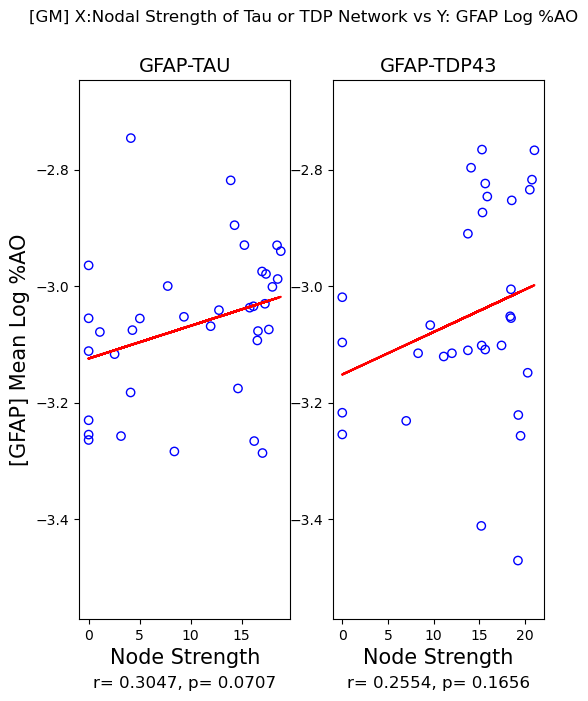

In [59]:
nonZeroDegCorr(GFAP_TAU_Drop, covTAU_Drop_GFAP_GM, GFAP_TDP_Drop, covTDP_Drop_GFAP_GM,
               'GFAP-TAU', 'GFAP-TDP43', 14,
               'Node Strength', '[GFAP] Mean Log %AO', 15,
               gfap_ferritin_Fig, '[GM] X:Nodal Strength of Tau or TDP Network vs Y: GFAP Log %AO', 
               linear_regression = True)

### Ferritin

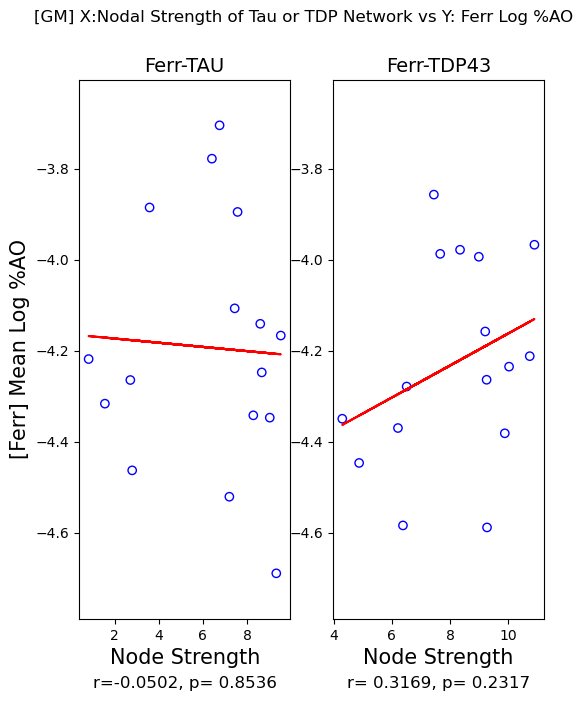

In [60]:
nonZeroDegCorr(Ferr_TAU_Drop, covTAU_Drop_Ferr_GM, Ferr_TDP_Drop, covTDP_Drop_Ferr_GM,
               'Ferr-TAU', 'Ferr-TDP43', 14,
               'Node Strength', '[Ferr] Mean Log %AO', 15,
               gfap_ferritin_Fig, '[GM] X:Nodal Strength of Tau or TDP Network vs Y: Ferr Log %AO', 
               linear_regression = True)

## Y-axis: GFAP or Ferritin Log %AO / X-axis: Nodal Strength of Tau or TDP43 Network [Prev-WM]

### GFAP

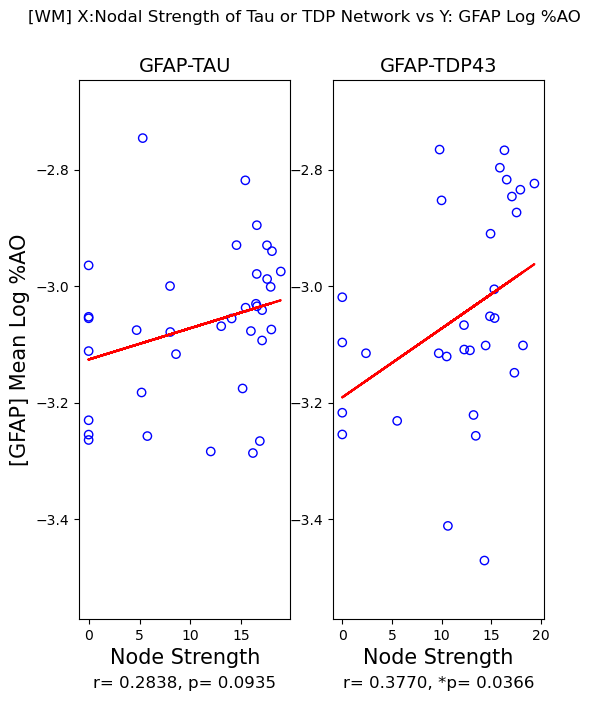

In [61]:
nonZeroDegCorr(GFAP_TAU_Drop, covTAU_Drop_GFAP_WM, GFAP_TDP_Drop, covTDP_Drop_GFAP_WM,
               'GFAP-TAU', 'GFAP-TDP43', 14,
               'Node Strength', '[GFAP] Mean Log %AO', 15,
               gfap_ferritin_Fig, '[WM] X:Nodal Strength of Tau or TDP Network vs Y: GFAP Log %AO', 
               linear_regression = True)

### Ferritin

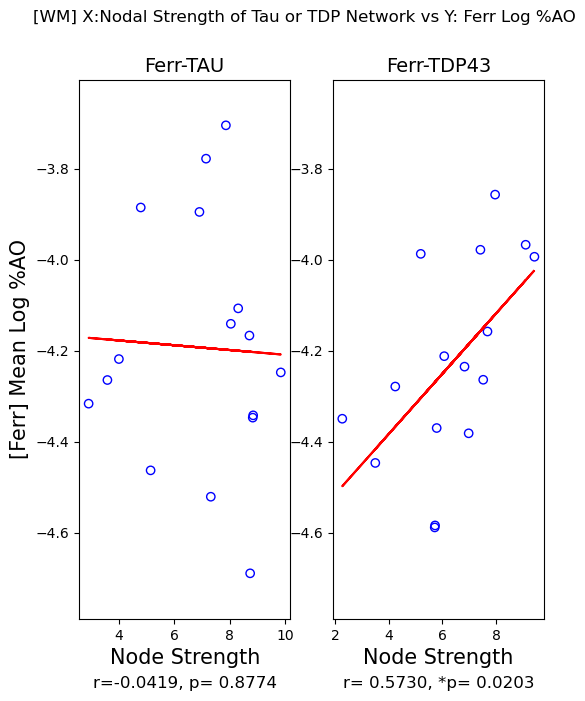

In [62]:
nonZeroDegCorr(Ferr_TAU_Drop, covTAU_Drop_Ferr_WM, Ferr_TDP_Drop, covTDP_Drop_Ferr_WM,
               'Ferr-TAU', 'Ferr-TDP43', 14,
               'Node Strength', '[Ferr] Mean Log %AO', 15,
               gfap_ferritin_Fig, '[WM] X:Nodal Strength of Tau or TDP Network vs Y: Ferr Log %AO', 
               linear_regression = True)

In [63]:
pd.DataFrame(covTDP_Drop_Ferr_GM).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,0.565968,0.626686,0.860185,0.735926,NaN,0.811340,0.892539,NaN,NaN,0.766031,0.712711,0.913189,NaN,0.822172,0.637730
1,0.565968,NaN,0.503453,0.473698,0.508415,NaN,0.420615,0.308020,NaN,NaN,0.520904,0.785460,0.809466,NaN,0.740652,0.742907
2,0.626686,0.503453,NaN,0.602245,0.626468,NaN,0.733407,0.404428,0.454907,0.347874,0.702871,0.560629,0.632176,0.360372,0.673160,0.433234
3,0.860185,0.473698,0.602245,NaN,0.656427,0.179102,0.767348,0.793775,0.562795,0.376377,0.887313,0.696134,0.780210,0.194417,0.826336,0.554849
4,0.735926,0.508415,0.626468,0.656427,NaN,NaN,0.804956,0.832402,0.900435,0.711673,0.847015,0.642351,0.757721,0.589399,0.896698,0.375034


In [64]:
pd.DataFrame(covTDP_Drop_Ferr_WM).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,0.420008,0.572150,0.586963,0.626147,NaN,0.779491,0.623346,0.928809,0.329175,0.354748,0.756522,0.267524,0.529567,0.642471,NaN
1,0.420008,NaN,0.199724,0.446007,0.432122,0.193223,0.618297,0.302117,0.942183,NaN,NaN,0.581028,0.473789,0.435699,0.682655,NaN
2,0.572150,0.199724,NaN,0.670003,0.476443,NaN,0.647108,0.338977,0.249497,NaN,0.545175,0.308249,0.225147,NaN,0.482896,0.478786
3,0.586963,0.446007,0.670003,NaN,0.581904,NaN,0.734446,0.655953,0.656033,0.505053,0.738331,0.605586,0.377258,NaN,0.833264,0.289798
4,0.626147,0.432122,0.476443,0.581904,NaN,0.103646,0.723286,0.572381,0.262829,0.514176,0.774715,0.596334,0.449322,NaN,0.503601,0.362441
